In [1]:
import pandas as fluff
import csv
import json
import pandas as pd
audio_features = pd.read_csv('audio_alive.csv',error_bad_lines=False)
ch = pd.read_csv('sentiment_alive_c.csv',error_bad_lines=False, encoding="ISO-8859-1")
vs = pd.read_csv('sentiment_alive_v.csv',error_bad_lines=False, encoding="ISO-8859-1")
merged_allfeatures = pd.merge(audio_features,ch, how='left', on='Song Title')
merged_allfeatures = pd.merge(merged_allfeatures,vs, how='left', on='Song Title')
merged_allfeatures.to_csv('all_features_alive.csv', index=False)
    

In [1]:
## load the iris data into a DataFrame
import pandas as pd
import numpy as np
songs = pd.read_csv('classification-data.csv',sep=',', encoding = "ISO-8859-1")

X = songs[["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"]].as_matrix()
y = np.array(songs['label']) 
X

array([[ 0.755442,  0.078146,  0.08736 , ...,  0.276   ,  0.      ,  0.0842  ],
       [ 0.455974,  0.203143,  0.36686 , ...,  0.478   ,  0.      ,  0.208   ],
       [ 0.505373,  0.272861,  0.028019, ...,  0.4     ,  1.      ,  0.352   ],
       ..., 
       [ 0.529145,  0.428521,  0.026457, ...,  0.507   ,  1.      ,  0.327   ],
       [ 0.730552,  0.190255,  0.106638, ...,  0.363   ,  1.      ,  0.647   ],
       [ 0.44162 ,  0.011451,  0.091995, ...,  0.17    ,  1.      ,  0.0742  ]])

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=2)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
knn.score(X_test, y_test)


0.92000000000000004

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [9]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file= None, 
                         feature_names=["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
#graph = graphviz.Source(dot_data) 

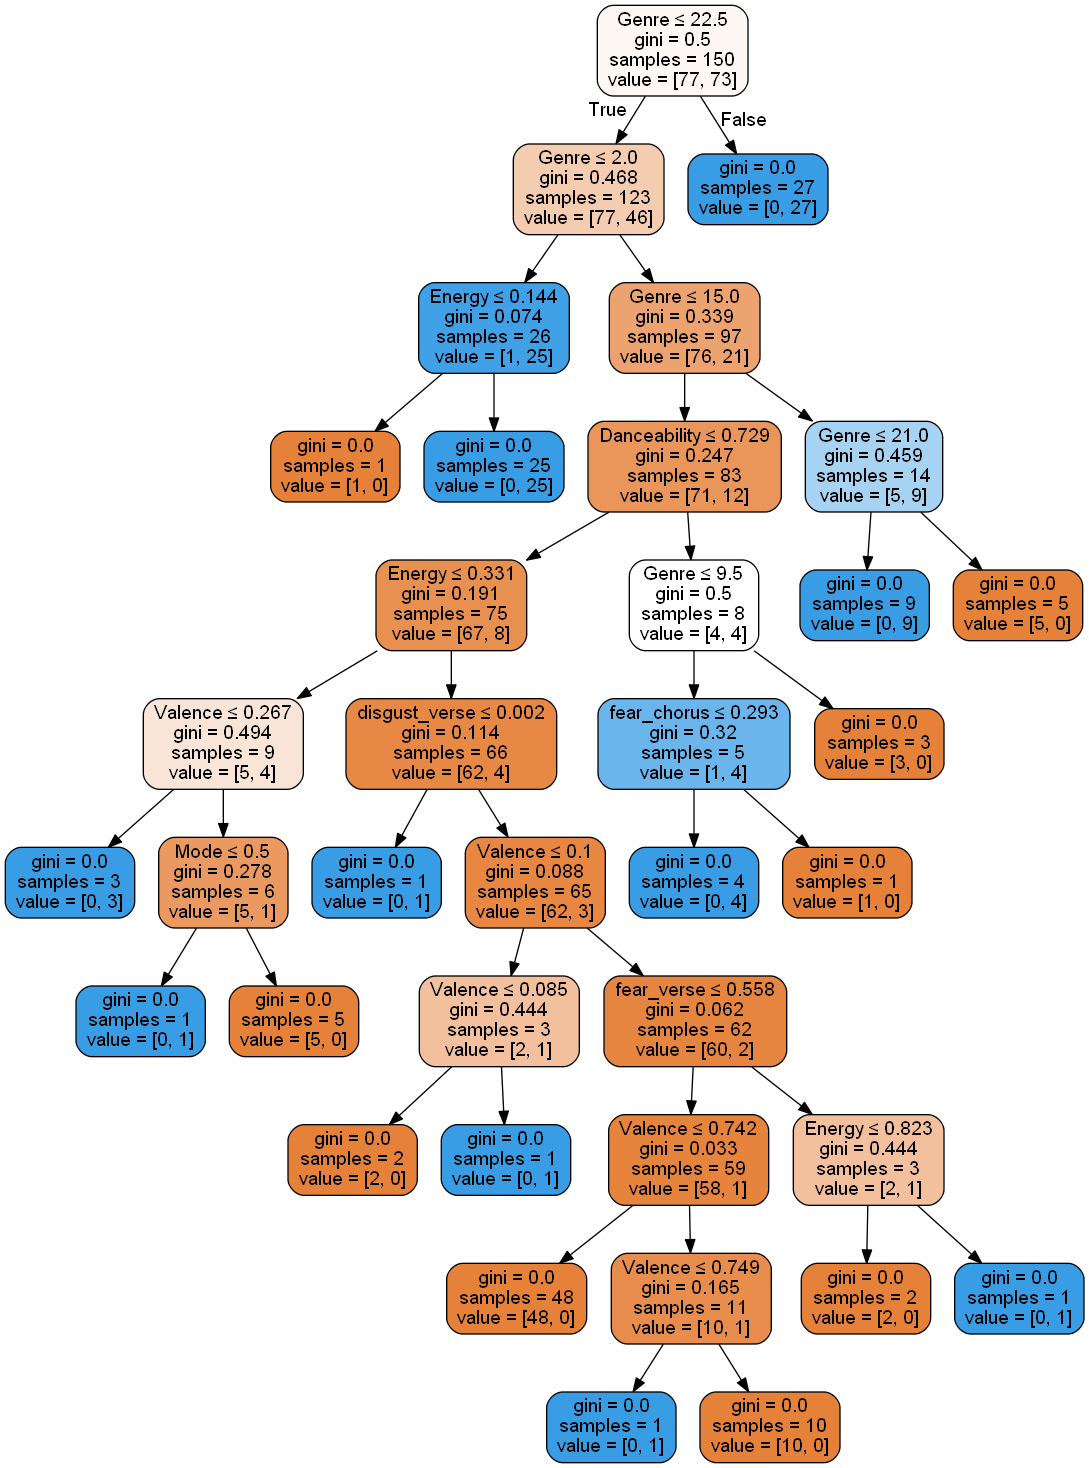

In [10]:
import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image

Image(pydot_graph.create_png())